# **regression of codon chnage an dmutability**

In [3]:
#load packages
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [50]:
#load data objects
data<-read.csv("data/dif_DNA/2021_05_01_codon_propChnage_2xcov_Rdf.csv")#the 2xcoverage i recently made 

In [51]:
head(data)

X,mut,mut_log10,codon_chnage_2x
TTT,1.490777e-05,-4.826587,0.39803868
TTC,1.384948e-05,-4.858567,-0.04292978
TTA,2.052268e-05,-4.687766,0.72729302
TTG,1.670667e-05,-4.777110,0.30820711
TCT,2.897483e-05,-4.537979,0.15641646
TCC,3.291822e-05,-4.482564,-0.21490141


In [52]:
model <- lm(codon_chnage_2x~mut_log10, data = data)

In [53]:
res<-resid(model)

In [54]:
summary(model)


Call:
lm(formula = codon_chnage_2x ~ mut_log10, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44359 -0.20023 -0.04537  0.17472  0.67530 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.49482    0.41931  -3.565 0.000708 ***
mut_log10   -0.34478    0.09376  -3.677 0.000495 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2838 on 62 degrees of freedom
Multiple R-squared:  0.179,	Adjusted R-squared:  0.1658 
F-statistic: 13.52 on 1 and 62 DF,  p-value: 0.0004951


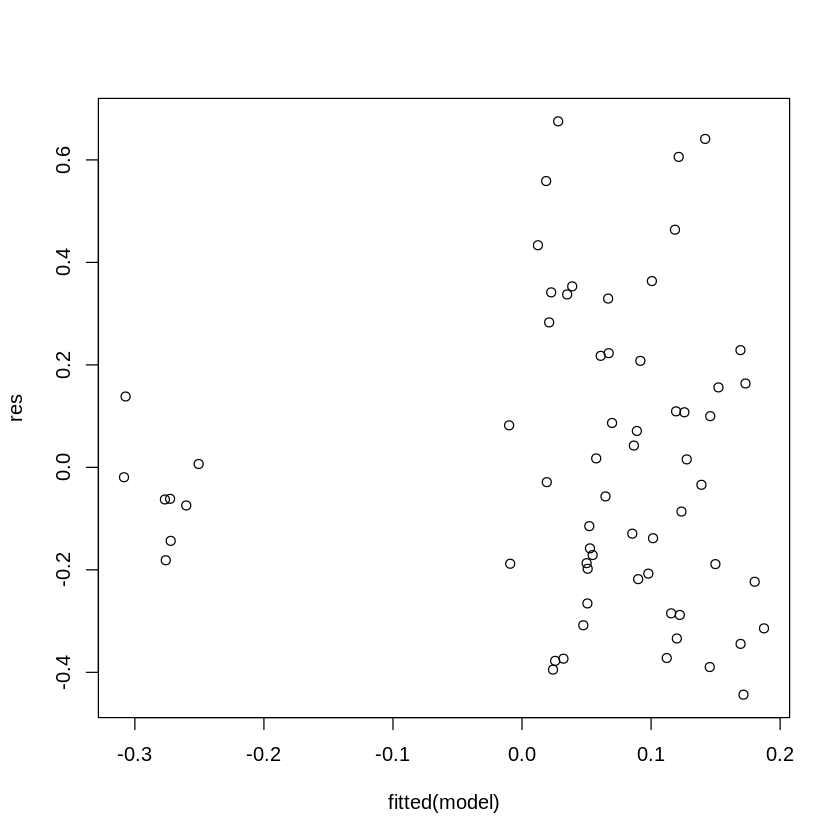

In [55]:
plot(fitted(model), res)
# png("plots/regression/countsChosen01mean_mut_linear_residuals_2021_05_01.png")
# plot(rnorm(20))
# dev.off()

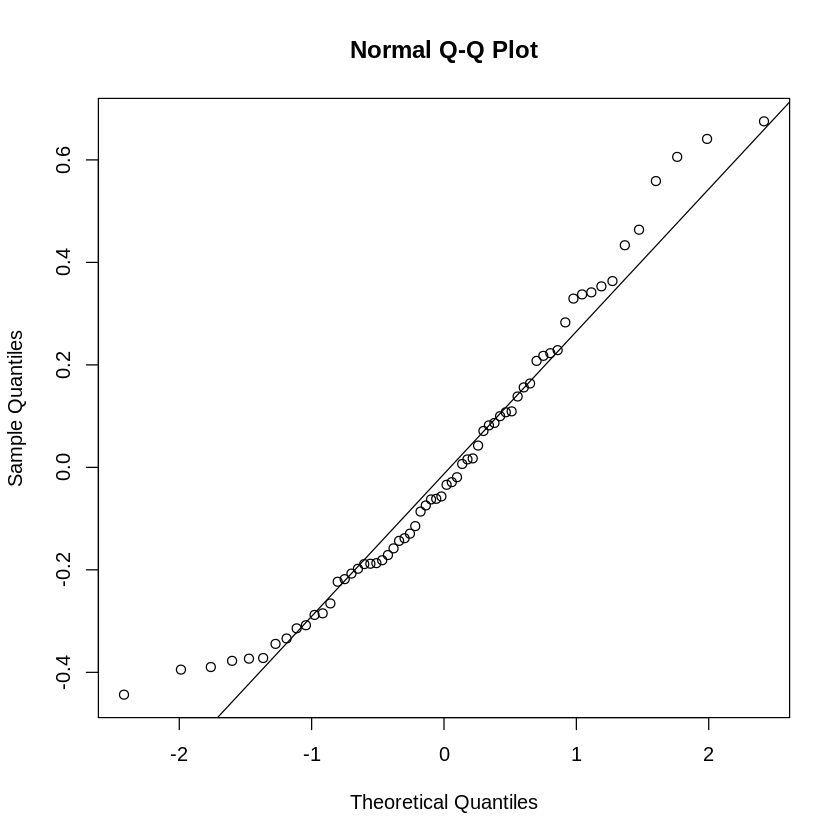

In [56]:
qqnorm(res)
qqline(res)
# png("plots/regression/countsChosen01mean_mut_linear_QQplot_2021_05_01.png")
# plot(rnorm(20))
# dev.off()

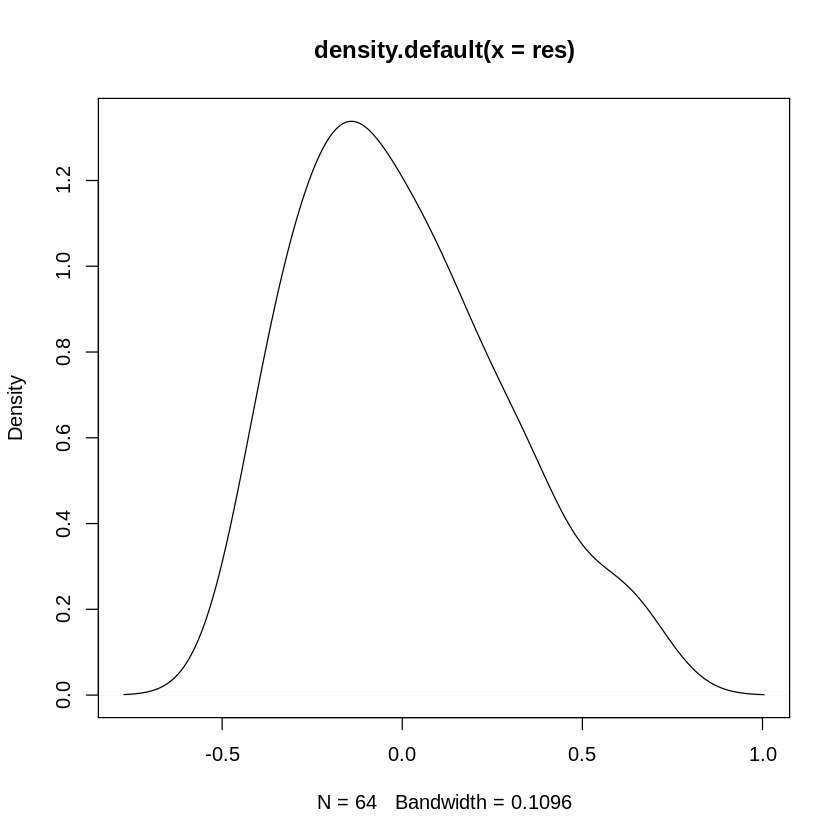

In [57]:
plot(density(res))
# png("plots/regression/countsChosen01mean_mut_linear_density_2021_05_01.png")
# plot(rnorm(20))
# dev.off()

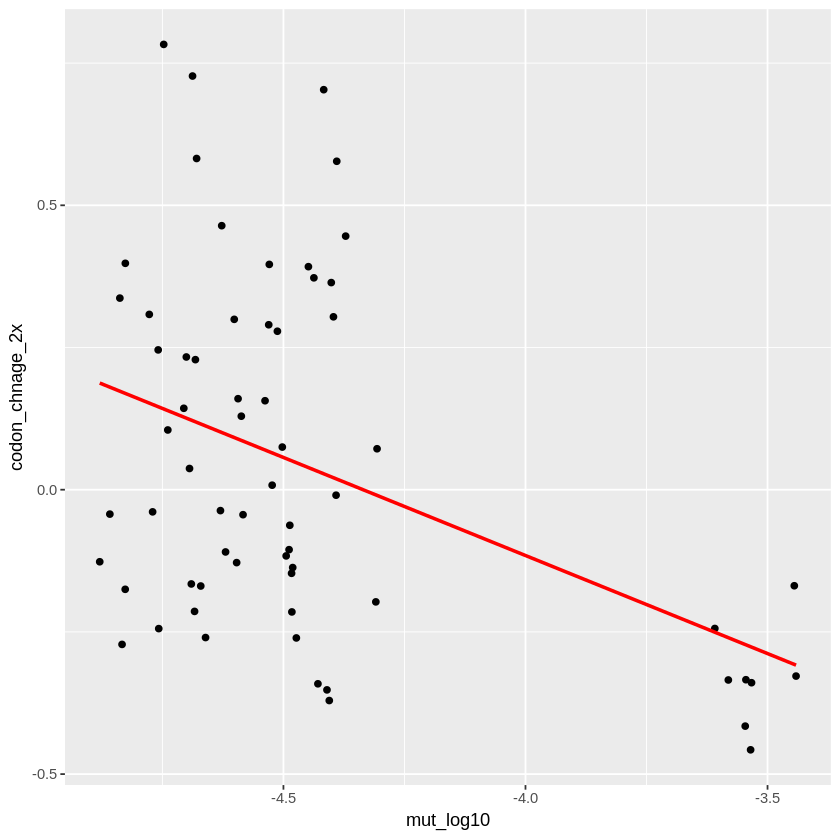

In [60]:
ggplot(data, aes(mut_log10, codon_chnage_2x))+
    geom_point(color = "black") +
    geom_smooth(method='lm', formula= y~x, se=FALSE, col="red", lwd=1)